# Homework 5 -- Xiao Li 223009075

# Question 1. Flyover states

['Arizona' 'California' 'Colorado' 'Connecticut' 'Illinois' 'Indiana'
 'Iowa' 'Kansas' 'Missouri' 'Nebraska' 'Nevada' 'New Jersey' 'New Mexico'
 'New York' 'Ohio' 'Pennsylvania' 'Utah' 'West Virginia']


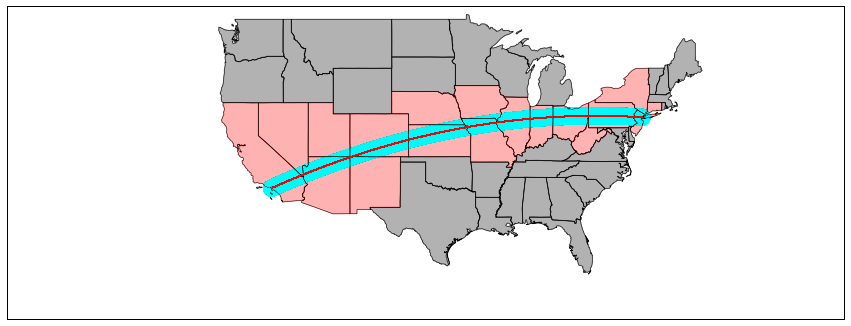

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import shapely.geometry
import shapely.ops
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(15,10))
m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
        urcrnrlon=-50.,urcrnrlat=50.,
        rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='merc',
        lat_0=40.,lon_0=-100.,lat_ts=20.)
m.readshapefile('/Users/lixiao/python4geosciences/materials/states_21basic/states', 'states')
s, t = m.gcpoints(-118.4081,33.9425 ,-74.1686 ,40.6925 , 1000)
point=[]
for i in range(0,len(s)):
    point.append(shapely.geometry.Point(s[i], t[i]))
line = shapely.geometry.LineString(point).buffer(100000)
polys=[]
for state in m.states:
    polys.append(shapely.geometry.Polygon(state))
List=[]
for i in range(len(polys)):
    if polys[i].intersects(line):
        color = 'r'
        List.append(m.states_info[i]['STATE_NAME'])
    else:
        color = 'k'
    coords = shapely.ops.cascaded_union(polys[i].boundary).coords[:]
    x, y = zip(*coords)
    plt.fill(x, y, color=color, alpha=0.3)
    plt.fill(*line.boundary.xy, color='cyan' , alpha=0.2)
    plt.plot(s, t, 'r-')
print(np.unique(List))

# Question 2. Area in a Voronoi diagram

the area contained in the finite regions = 1.0138912213334281
the area of 0.001 unit away from any boundary / area = 0.986090261784083
the area of 0.01 unit away from any boundary / area = 0.8652536153511616
the area of 0.1 unit away from any boundary / area = 0.09244245663939883


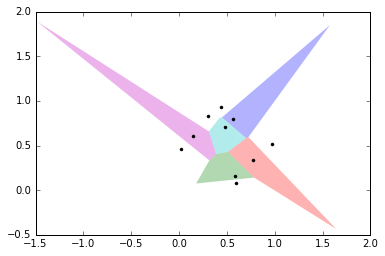

In [6]:
from scipy import spatial
pts =  np.array([[ 0.77354201,  0.34072038],
           [ 0.43807549,  0.93001924],
           [ 0.5624092 ,  0.79438991],
           [ 0.02536295,  0.46180244],
           [ 0.59533179,  0.07522803],
           [ 0.47867418,  0.70302822],
           [ 0.30371564,  0.83135442],
           [ 0.5856915 ,  0.16340903],
           [ 0.14700491,  0.60268997],
           [ 0.97098631,  0.51692456]])  
vor = spatial.Voronoi(pts)

for indices in vor.regions:
    if not indices: continue     # check for empty regions
    if -1 in indices: continue   # region includes a vertex out of the diagram (the region goes to infinity)
    plt.fill(vor.vertices[indices, 0], vor.vertices[indices, 1], edgecolor='none', alpha=0.3)

plt.plot(pts[:, 0], pts[:, 1], '.k')

lines = [
    shapely.geometry.LineString(vor.vertices[line])
    for line in vor.ridge_vertices
    if -1 not in line
]
polys=[]
area=0
Ab01=0
Ab001=0
Ab0001=0
for poly in shapely.ops.polygonize(lines):
    polys.append(poly)
    area+=poly.area
    Ab01+=poly.buffer(-0.1).area
    Ab001+=poly.buffer(-0.01).area
    Ab0001+=poly.buffer(-0.001).area
    
print('the area contained in the finite regions = ' + str(area))
print('the area of 0.001 unit away from any boundary / area = ' + str(Ab0001/area))
print('the area of 0.01 unit away from any boundary / area = ' + str(Ab001/area))
print('the area of 0.1 unit away from any boundary / area = ' + str(Ab01/area))


# Question 3. 2D interpolation

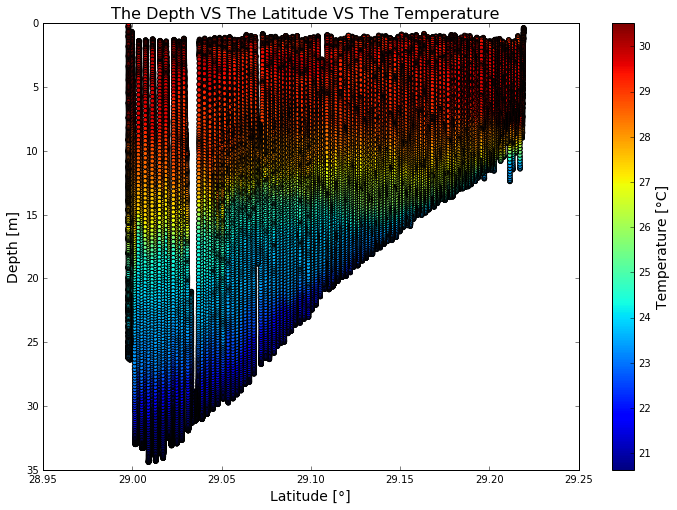

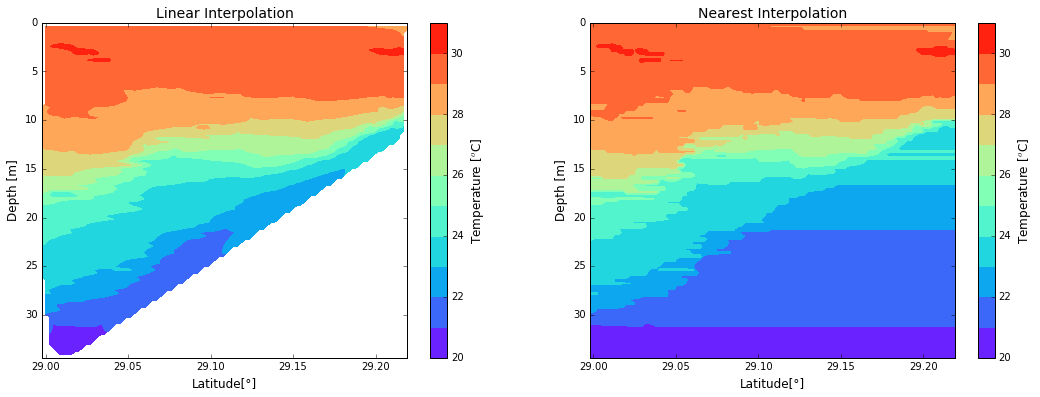

In [32]:
from scipy import interpolate
plt.figure(figsize=(12,8))

data = np.genfromtxt('/Users/lixiao/python4geosciences/data/MS03_L15.txt', skip_header=114)
lat=data[:,0]
dep=data[:,2]
temp=data[:,3]
p = plt.scatter(lat, dep, c=temp, cmap='jet')
plt.gca().invert_yaxis()
bar = plt.colorbar(p)
bar.set_label('Temperature [°C]', size=14)
plt.ylabel('Depth [m]', size=14)
plt.xlabel('Latitude [°]', size=14)
plt.ylim(35,0)
plt.title('The Depth VS The Latitude VS The Temperature  ', size=16)

fig = plt.figure(figsize=(18, 6))

x = np.linspace(lat.min(), lat.max(), 100)
y = np.linspace(dep.min(), dep.max(), 100)
x, y = np.meshgrid(x, y)
z_lin = interpolate.griddata((lat, dep), temp, (x, y), method='linear')
z_near = interpolate.griddata((lat, dep), temp, (x, y), method='nearest')
z_cub = interpolate.griddata((lat, dep), temp, (x, y), method='cubic')

ax = fig.add_subplot(1,2,1)
p_lin = ax.contourf(x,y,z_lin, 10, cmap='rainbow')
bar_lin = plt.colorbar(p_lin)
ax.set_ylabel('Depth [m]', size=12)
ax.set_xlabel('Latitude[°]', size=12)
bar_lin.set_label('Temperature [$^{o}$C]', size=12)
ax.set_title('Linear Interpolation', size=14)
ax.invert_yaxis()

ax = fig.add_subplot(1,2,2)
p_near = ax.contourf(x,y,z_near, 10, cmap='rainbow')
bar_near = plt.colorbar(p_near)
ax.set_ylabel('Depth [m]', size=12)
ax.set_xlabel('Latitude[°]', size=12)
bar_near.set_label('Temperature [$^{o}$C]', size=12)
ax.set_title('Nearest Interpolation', size=14)
ax.invert_yaxis()


# Question 4. (Grad) Area of Greenland and Australia in different projections

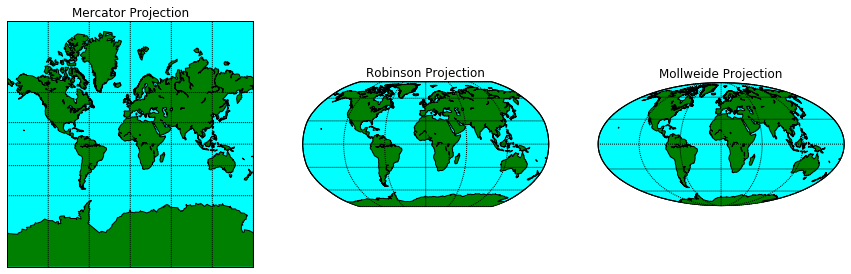

In Mercator Projection, the area of Australia is 0.2761095582554131 times Greenland
In Mercator Projection, The area of Australia is 8501235.310688762km square
In Mercator Projection, The area of Greenland is 30789355.37184394km square


In Robinson Projection, the area of Australia is 1.98408912789208 times Greenland
In Robinson Projection, The area of Australia is 6791690.51863253km square
In Robinson Projection, The area of Greenland is 3423077.3321398636km square


In Mollweide Projection, the area of Australia is 3.6073190895469676 times Greenland
In Mollweide Projection, The area of Australia is 7699609.269277655km square
In Mollweide Projection, The area of Greenland is 2134440.862630931km square


In [30]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,3,1)
#Mercator Projection
ax.set_title("Mercator Projection")
m1 = Basemap(projection='merc',llcrnrlat=-85,urcrnrlat=85,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m1.drawcoastlines()
m1.fillcontinents(color='green',lake_color='aqua')
m1.drawparallels(np.arange(-90.,91.,30.))
m1.drawmeridians(np.arange(-180.,181.,60.))
m1.drawmapboundary(fill_color='aqua')
m1.readshapefile('/Users/lixiao/python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
m1.readshapefile('/Users/lixiao/python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)
GA1=0
AA1=0
for state in m1.greenland:
    GA1+=shapely.geometry.Polygon(state).area
for state in m1.australia:
    AA1+=shapely.geometry.Polygon(state).area
    
#Robinson Projection    
ax = fig.add_subplot(1,3,2)
ax.set_title("Robinson Projection")
m2 = Basemap(projection='robin',lon_0=0,resolution='c')
m2.drawcoastlines()
m2.fillcontinents(color='green',lake_color='aqua')
m2.drawparallels(np.arange(-90.,120.,30.))
m2.drawmeridians(np.arange(0.,360.,60.))
m2.drawmapboundary(fill_color='aqua')
m2.readshapefile('/Users/lixiao/python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
m2.readshapefile('/Users/lixiao/python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)
GA2=0
AA2=0
for state in m2.greenland:
    GA2+=shapely.geometry.Polygon(state).area
for state in m2.australia:
    AA2+=shapely.geometry.Polygon(state).area

#Mollweide Projection
ax = fig.add_subplot(1,3,3)
ax.set_title("Mollweide Projection")
m3 = Basemap(projection='moll',lon_0=0,resolution='c')
m3.drawcoastlines()
m3.fillcontinents(color='green',lake_color='aqua')
m3.drawparallels(np.arange(-90.,120.,30.))
m3.drawmeridians(np.arange(0.,420.,60.))
m3.drawmapboundary(fill_color='aqua')
m3.readshapefile('/Users/lixiao/python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
m3.readshapefile('/Users/lixiao/python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)
GA3=0
AA3=0
for state in m3.greenland:
    GA3+=shapely.geometry.Polygon(state).area
for state in m3.australia:
    AA3+=shapely.geometry.Polygon(state).area

plt.show()
print('In Mercator Projection, the area of Australia is '+str(AA1/GA1)+' times Greenland')
print('In Mercator Projection, The area of Australia is '+ str(AA1*0.000001) + 'km square')
print('In Mercator Projection, The area of Greenland is '+ str(GA1*0.000001) + 'km square')
print('\n')
print('In Robinson Projection, the area of Australia is '+str(AA2/GA2)+' times Greenland')
print('In Robinson Projection, The area of Australia is '+ str(AA2*0.000001) + 'km square')
print('In Robinson Projection, The area of Greenland is '+ str(GA2*0.000001) + 'km square')
print('\n')
print('In Mollweide Projection, the area of Australia is '+str(AA3/GA3)+' times Greenland')
print('In Mollweide Projection, The area of Australia is '+ str(AA3*0.000001) + 'km square')
print('In Mollweide Projection, The area of Greenland is '+ str(GA3*0.000001) + 'km square')

In thre reality, 
the area of Australia is about 7.692 million km²
the area of Greenland is about 2.166 million km²
Becase the Mollweide Projection is an equal area projection, whose result is close to the reality.